# Taiwan GEBCO bathymetry

### Download and plot bathymetry data around Taiwan using Datamesh


In [ ]:
import cmocean
import warnings
import cartopy.crs as ccrs
from cartopy import feature as cfeature
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

from oceanum.datamesh import Connector

warnings.filterwarnings("ignore")

## Connect to datamesh
Define your datamesh token in evironment variables as DATAMESH_TOKEN or insert into argument below.

In [2]:
conn = Connector(token=None)

Using datamesh API version 0
You are using version 1.0.12 of oceanum_python which is the latest version available.


## Query the data

Load the latest version of the GEBCO data around Taiwan

In [4]:
west = 119.9
south = 21.8
east = 122.2
north = 25.4

dset = conn.query(
    datasource="gebco_2025",
    geofilter={
        "type": "bbox", "geom": [west, south, east, north]},
)

dset

<xarray.Dataset> Size: 2MB
Dimensions:           (lat: 864, lon: 552)
Coordinates:
  * lat               (lat) float64 7kB 21.8 21.81 21.81 ... 25.39 25.39 25.4
  * lon               (lon) float64 4kB 119.9 119.9 119.9 ... 122.2 122.2 122.2
Data variables:
    crs               |S1 1B b''
    elevation         (lat, lon) int16 954kB -2265 -2182 -2072 ... -349 -343
    elevation_subice  (lat, lon) int16 954kB -2265 -2182 -2072 ... -349 -343
    tid               (lat, lon) int8 477kB 11 11 11 11 11 11 ... 70 70 70 70 70
Attributes: (12/39)
    Conventions:                     CF-1.6, ACDD-1.3
    comment:                         The data in the GEBCO_2025 Grid should n...
    creator_email:                   gdacc@seabed2030.org
    creator_name:                    GEBCO through the Nippon Foundation-GEBC...
    creator_type:                    International organisation
    creator_url:                     https://www.gebco.net
    ...                              ...
    source:                          The GEBCO_2025 Grid is the 2025 release ...
    summary:                         The GEBCO_2025 Grid is a continuous, glo...
    title:                           The GEBCO_2025 Grid - a continuous terra...
    _coordinates:                    {"x":"lon","y":"lat"}
    _request_size:                   2395969
    _domain_size:                    476928

## Plotting the bathymetry

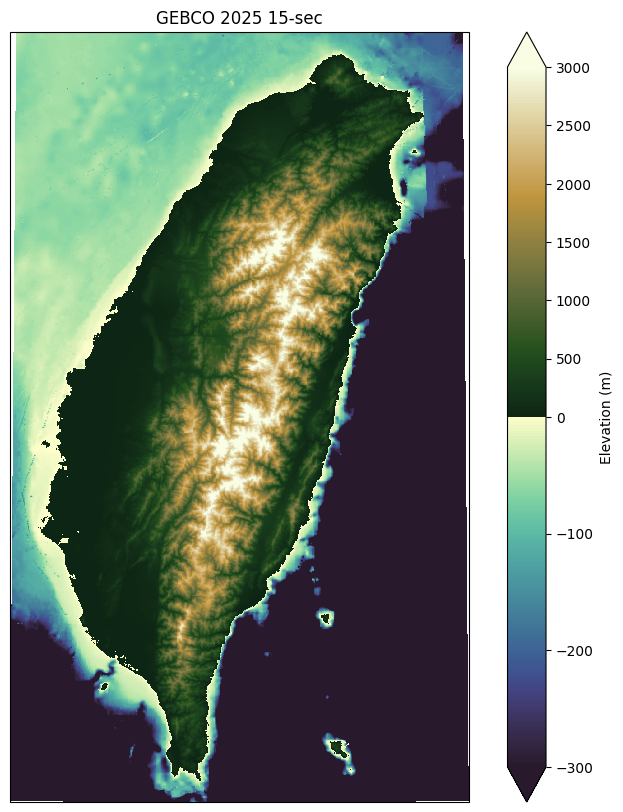

In [ ]:
projection = ccrs.TransverseMercator(central_longitude=(float(dset.lon.mean())))
transform = ccrs.PlateCarree()

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"projection": projection})

dset.elevation.plot(
    ax=ax,
    cmap=cmocean.cm.topo,
    transform=transform,
    norm=colors.TwoSlopeNorm(vmin=-300, vmax=3000, vcenter=0),
    cbar_kwargs={"label": "Elevation (m)", "ticks": [-300, -200, -100, 0, 500, 1000, 1500, 2000, 2500, 3000]}
)
t = ax.set_title("GEBCO 2025 15-sec")